# Task 1: Import neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Task 1.1 : Import data

In [12]:
income=pd.read_csv(r"K:\Desktop\NIIT\Concept\Course9\DS2_C5_S1_Income_Data_Practice.csv")
income

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


# Task 2 : Summarize and shape

In [13]:
print(income.info())
print()
print("Shape = ",income.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Gender          32561 non-null  object
 9   Capital_Gain    32561 non-null  int64 
 10  Capital_Loss    32561 non-null  int64 
 11  Hours_Per_Week  32561 non-null  int64 
 12  Native_Country  32561 non-null  object
 13  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB
None

Shape =  (32561, 14)


In [14]:
income.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education_Num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital_Gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital_Loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours_Per_Week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [16]:
def summarize(df):
    cols=df.select_dtypes(include=['object']).columns
    for item in cols:
        print(df[item].value_counts())
summarize(income)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WorkClass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_Status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

# Task 3 : NA values and imputation

In [15]:
income.isna().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

# Task 4 : Convert non numeric into categorical dtypes

In [17]:
def conversion_category(df):
    cols=df.select_dtypes(include=['object']).columns
    for item in cols:
        df[item]=df[item].astype('category')
    return df
income=conversion_category(income)
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32561 non-null  int64   
 1   WorkClass       32561 non-null  category
 2   Fnlwgt          32561 non-null  int64   
 3   Education       32561 non-null  category
 4   Education_Num   32561 non-null  int64   
 5   Marital_Status  32561 non-null  category
 6   Occupation      32561 non-null  category
 7   Relationship    32561 non-null  category
 8   Gender          32561 non-null  category
 9   Capital_Gain    32561 non-null  int64   
 10  Capital_Loss    32561 non-null  int64   
 11  Hours_Per_Week  32561 non-null  int64   
 12  Native_Country  32561 non-null  category
 13  Income_Bracket  32561 non-null  category
dtypes: category(8), int64(6)
memory usage: 1.7 MB


# Task 4.1 : Converting categorical into numerical 

In [29]:
labeler=preprocessing.LabelEncoder()
df_encoded=income.copy()
cols=df_encoded.select_dtypes(include=['category']).columns
for item in cols:
    df_encoded[item]=labeler.fit_transform(df_encoded[item])

df_encoded.describe()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [30]:
scaler=MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded.to_numpy()),columns=df_encoded.columns)
df_scaled

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,0.021740,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,0.000000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,0.000000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,1.0,0.000000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.0,0.000000,0.0,0.397959,0.121951,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.500,0.166404,0.466667,0.733333,0.333333,0.928571,1.0,0.0,0.000000,0.0,0.377551,0.951220,0.0
32557,0.315068,0.500,0.096500,0.733333,0.533333,0.333333,0.500000,0.0,1.0,0.000000,0.0,0.397959,0.951220,1.0
32558,0.561644,0.500,0.094827,0.733333,0.533333,1.000000,0.071429,0.8,0.0,0.000000,0.0,0.397959,0.951220,0.0
32559,0.068493,0.500,0.128499,0.733333,0.533333,0.666667,0.071429,0.6,1.0,0.000000,0.0,0.193878,0.951220,0.0


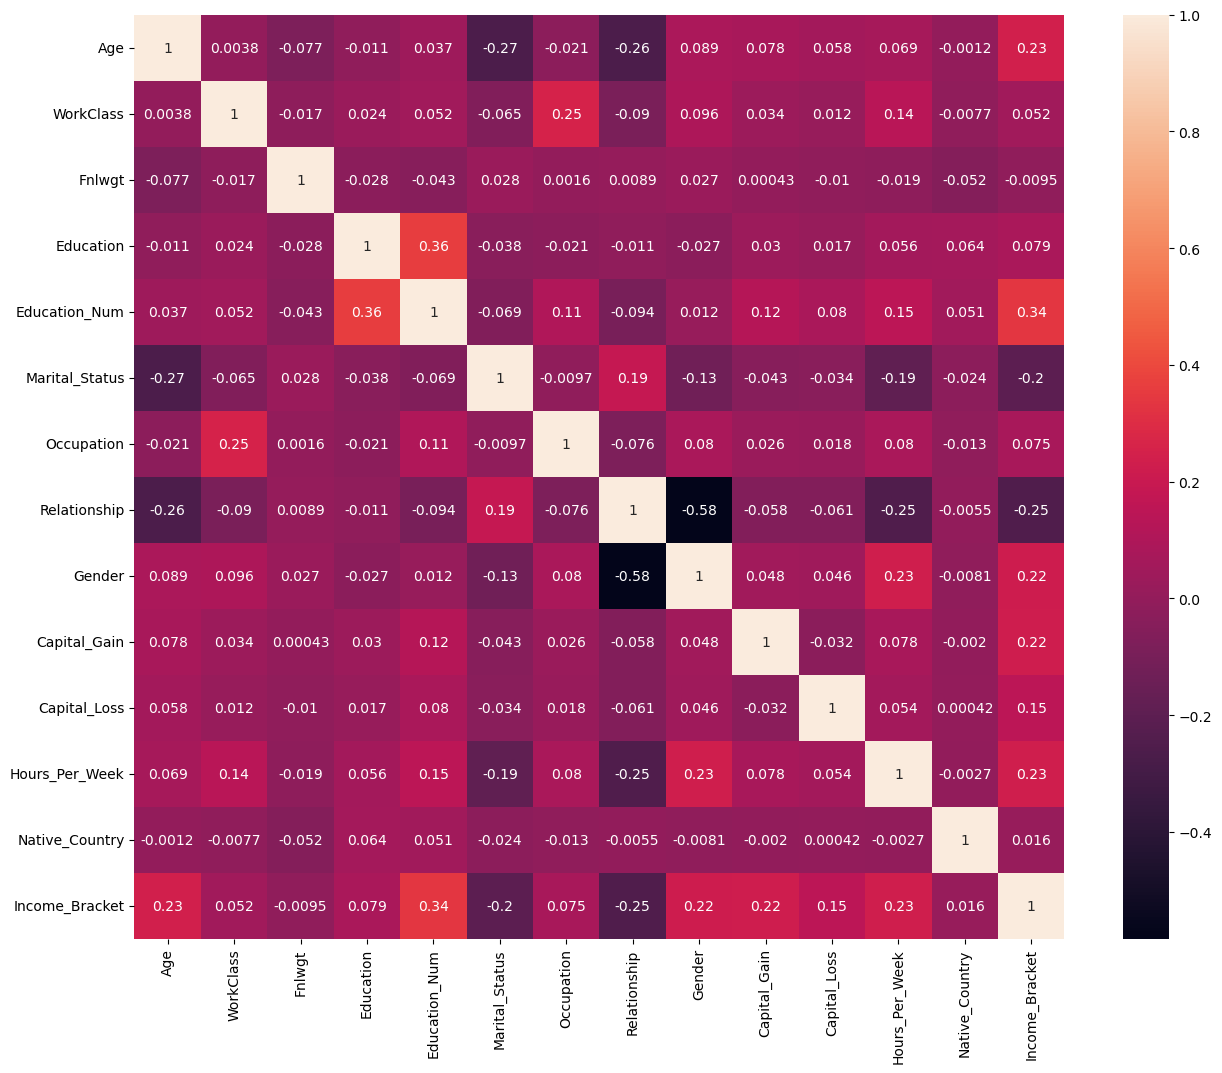

In [35]:
plt.rcParams["figure.figsize"] = (15,12)
sns.heatmap(df_scaled.corr(),annot=True)
plt.show()


# Split test and train

In [39]:
split=int(len(df_scaled)*0.7)
X=df_scaled[:split]
Y=df_scaled[(split+1):]
print("The structure of X is {0} and Y is {1}".format(X.shape,Y.shape))

The structure of X is (22792, 14) and Y is (9768, 14)


In [53]:
x=df_scaled.iloc[:,:13]
y=df_scaled.iloc[:,13]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

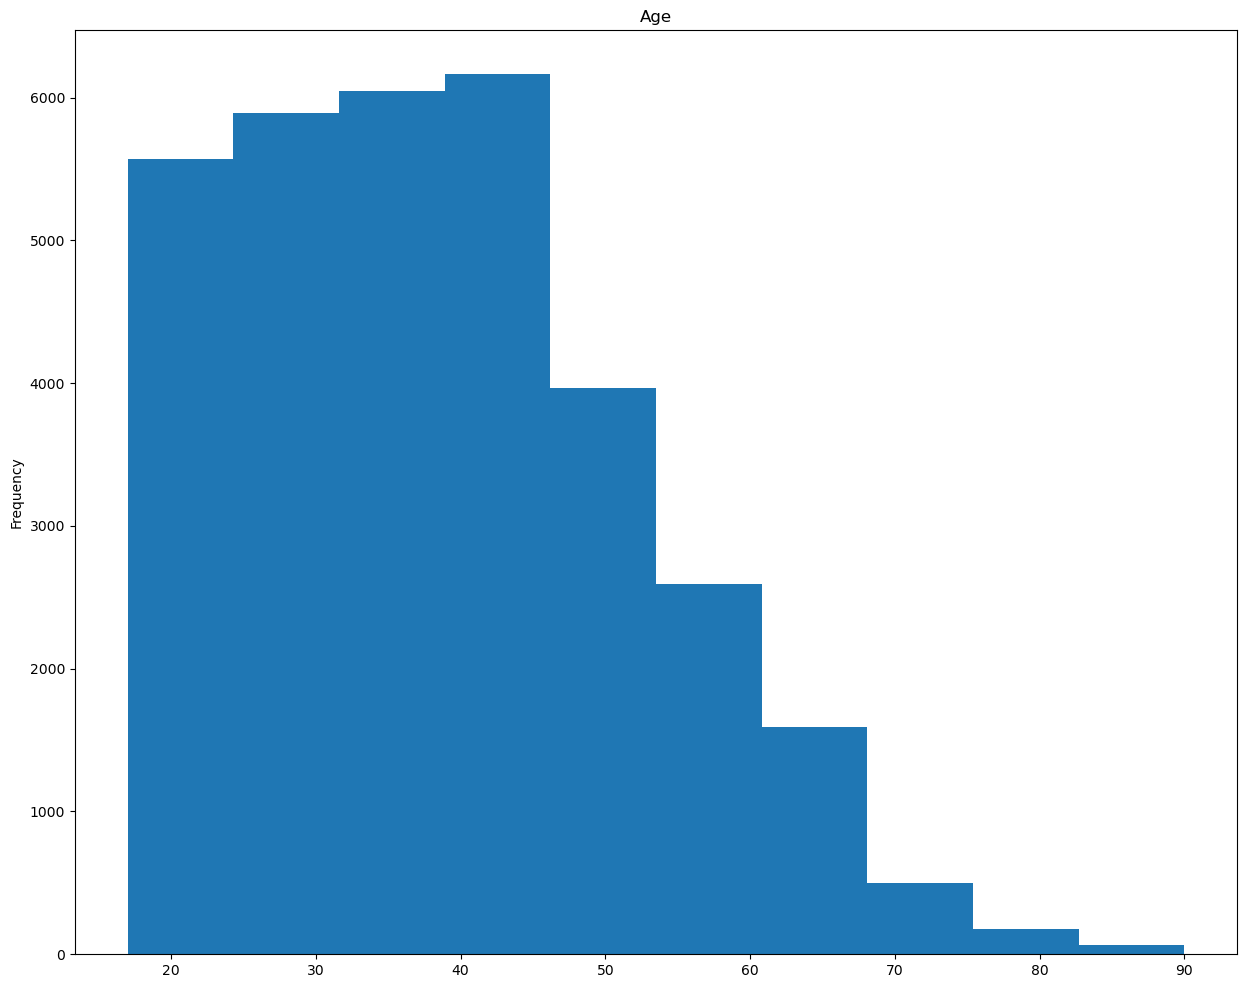

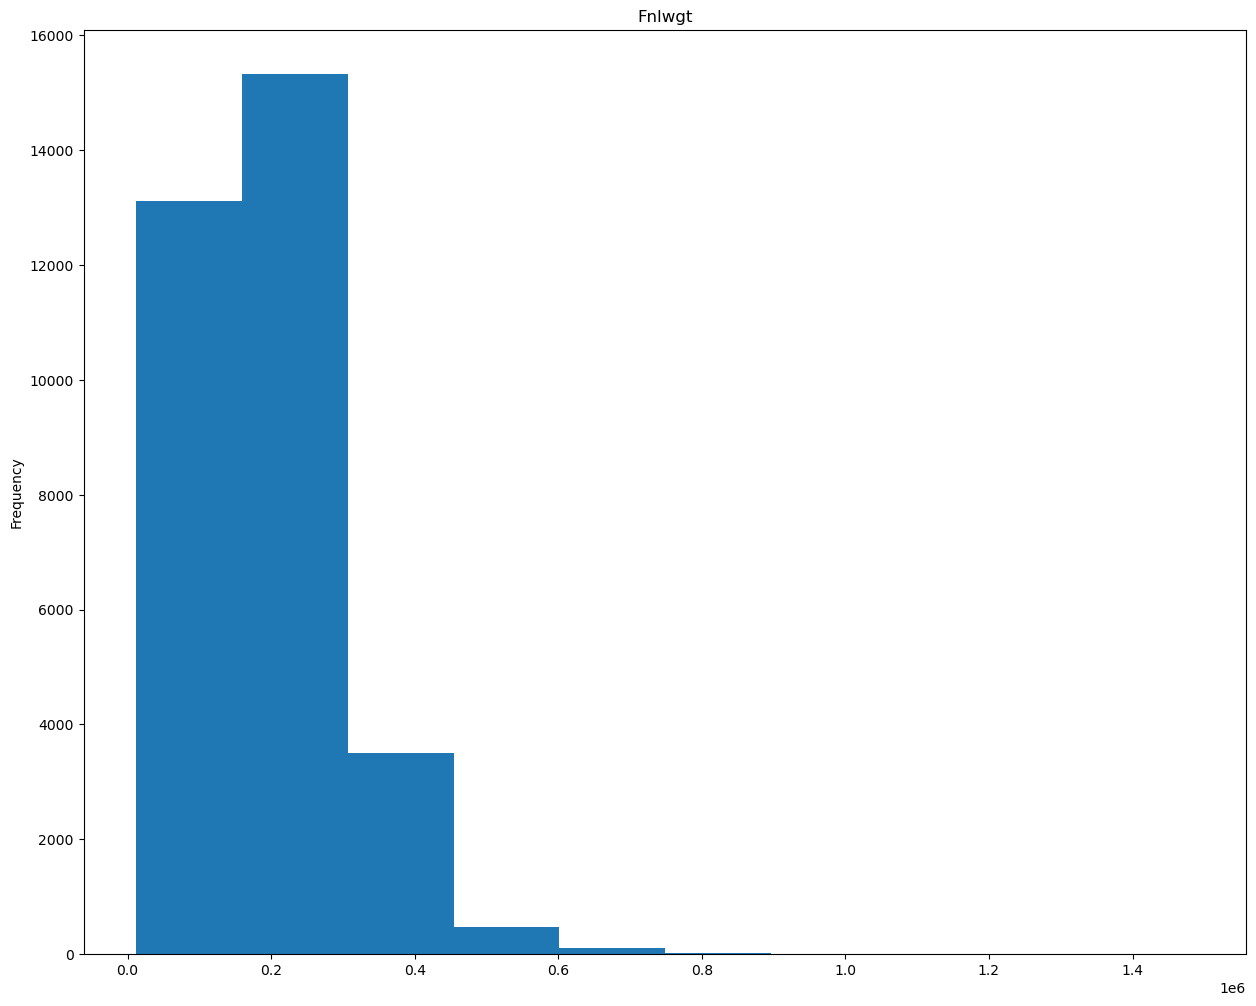

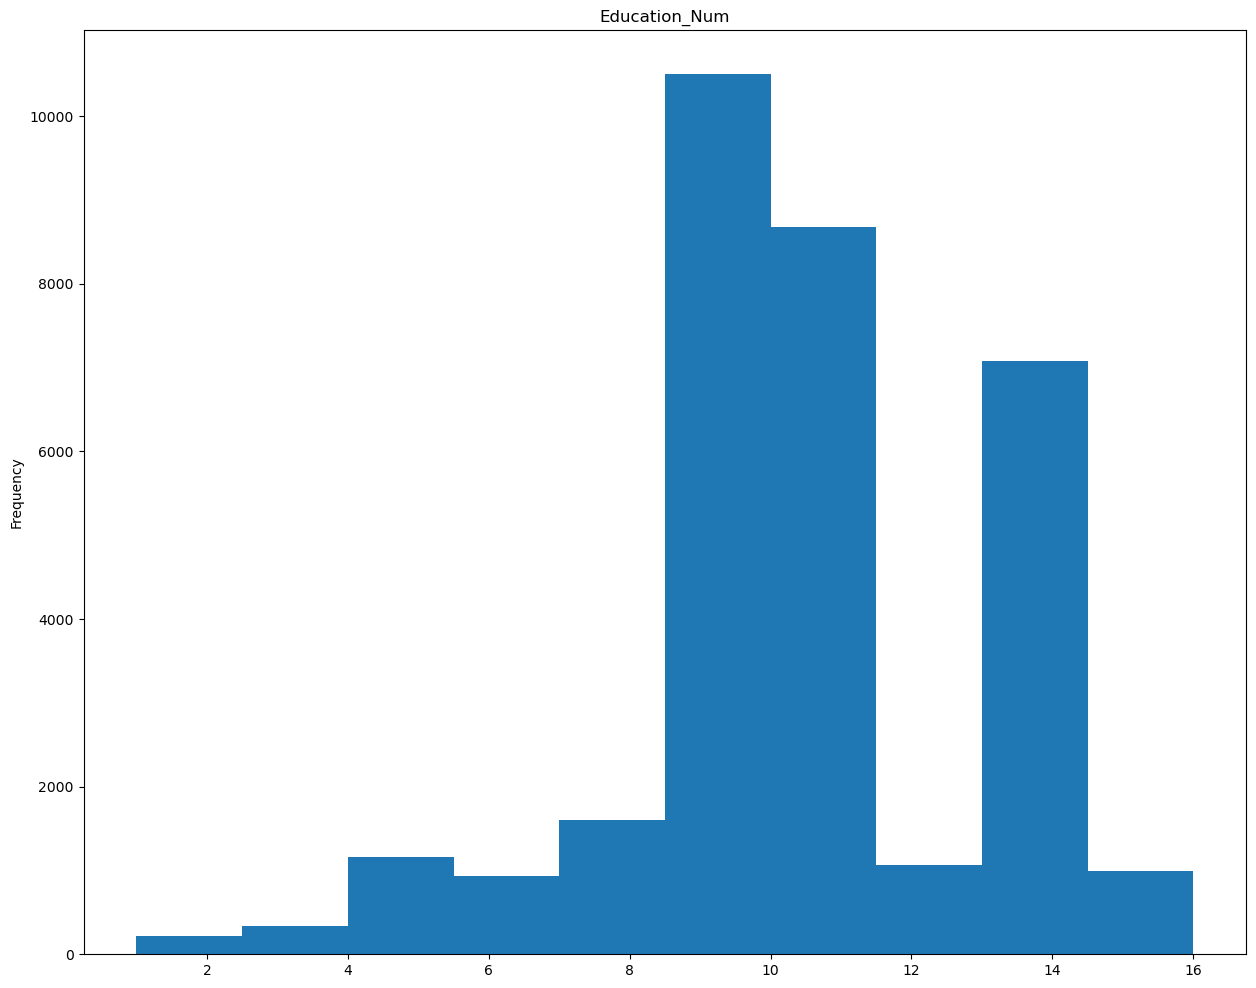

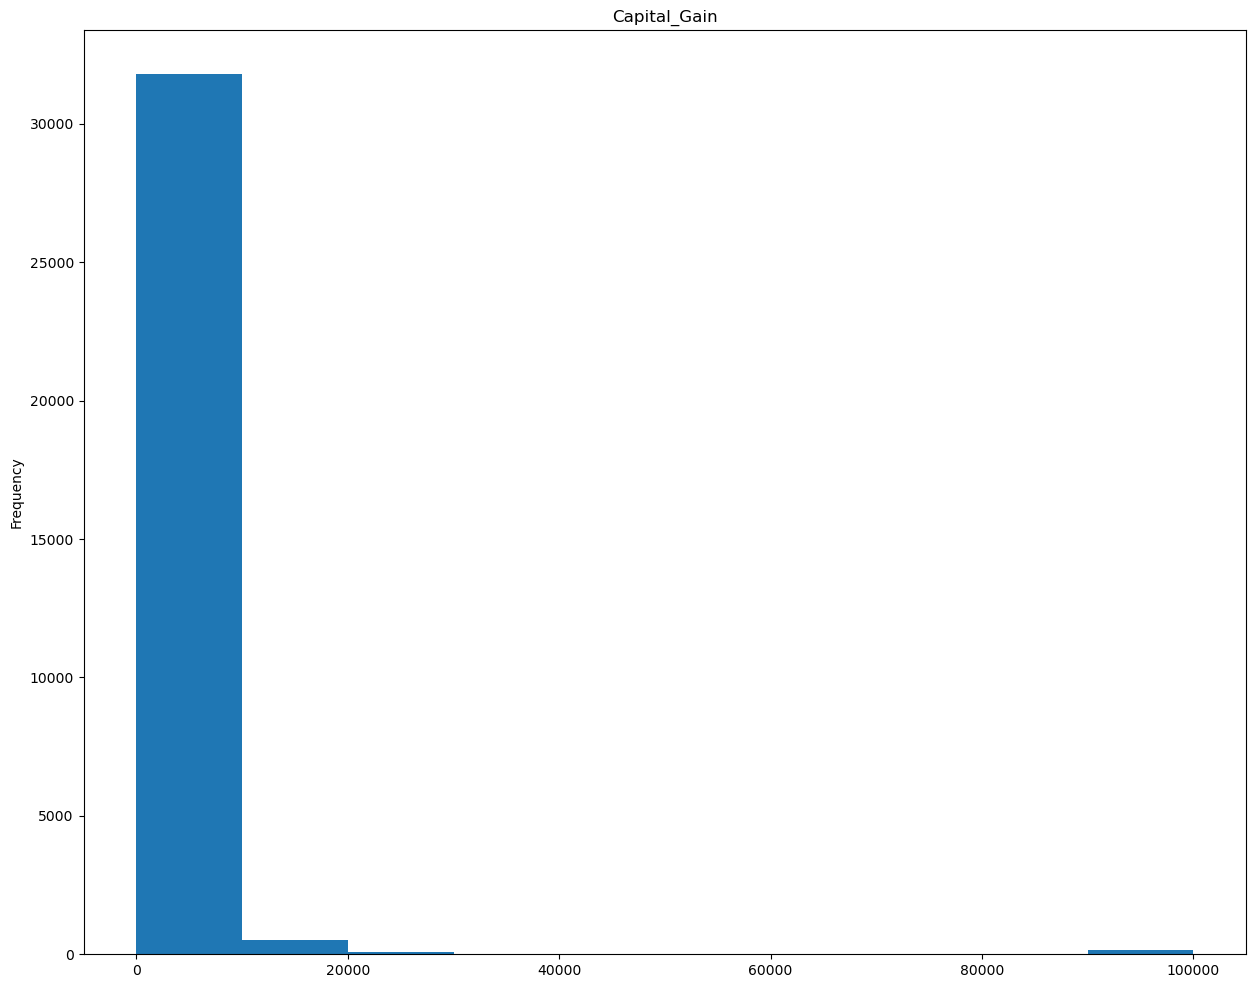

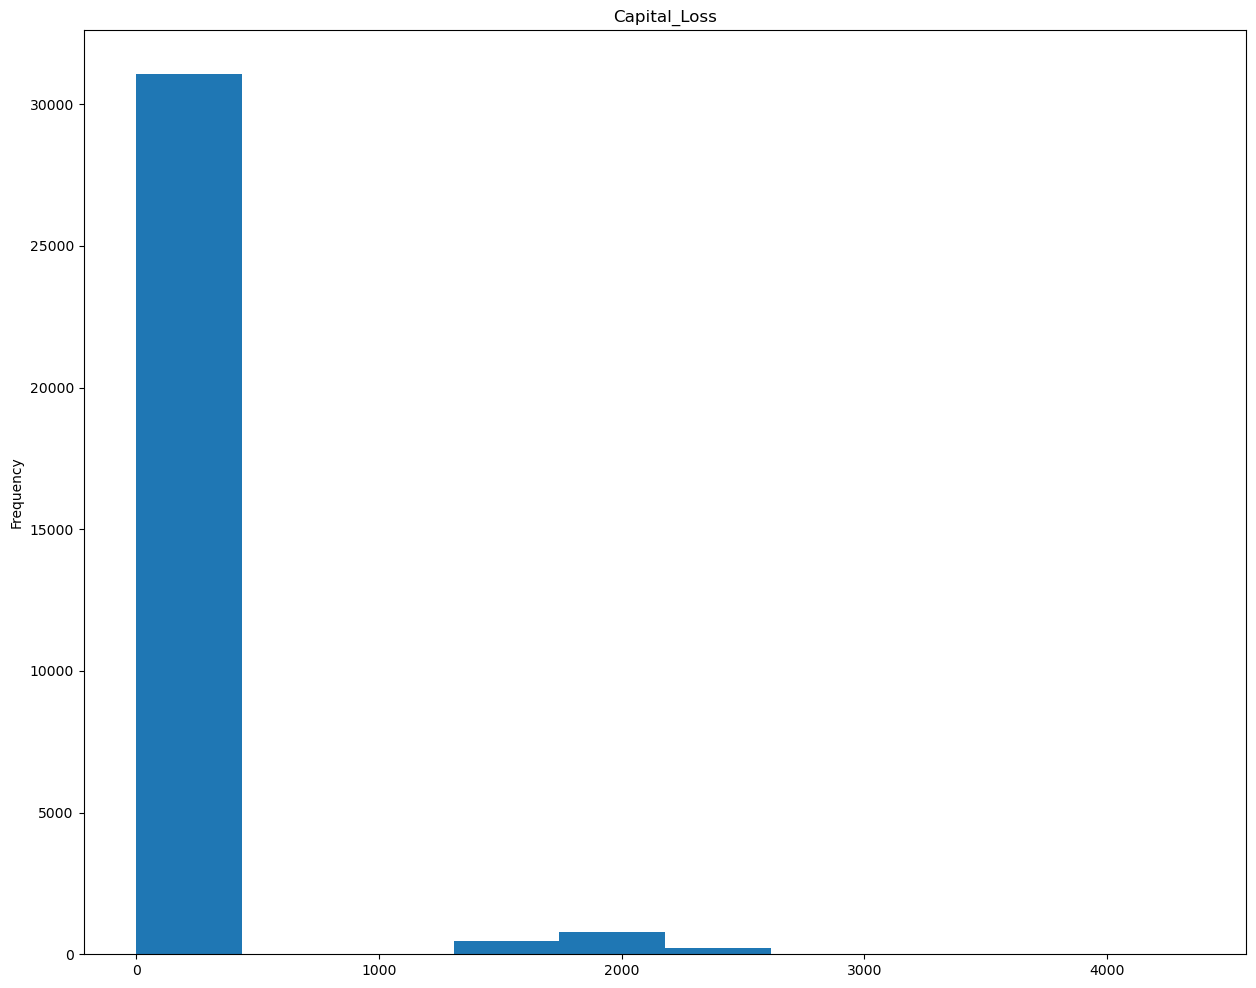

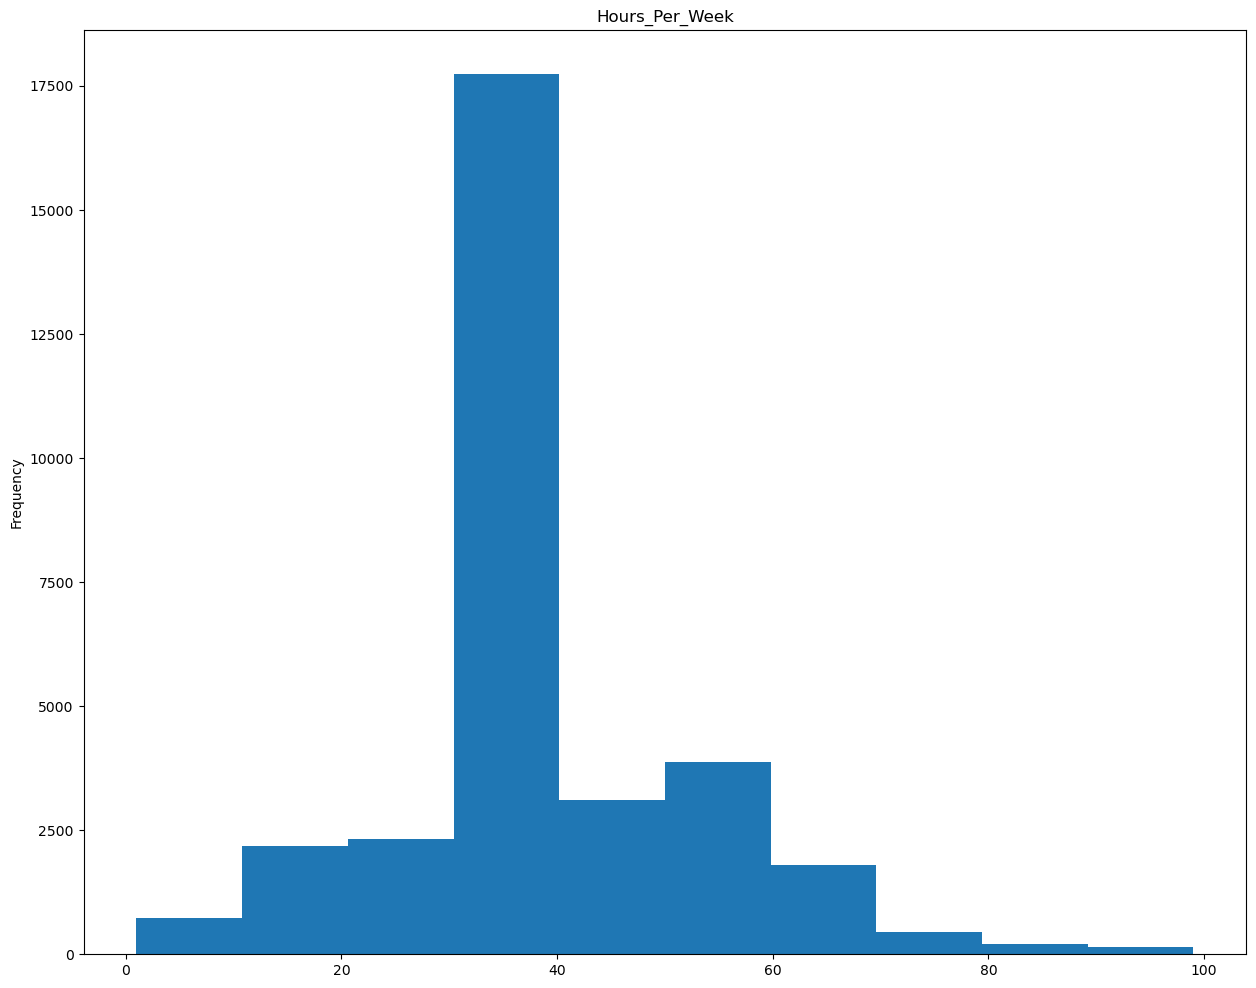

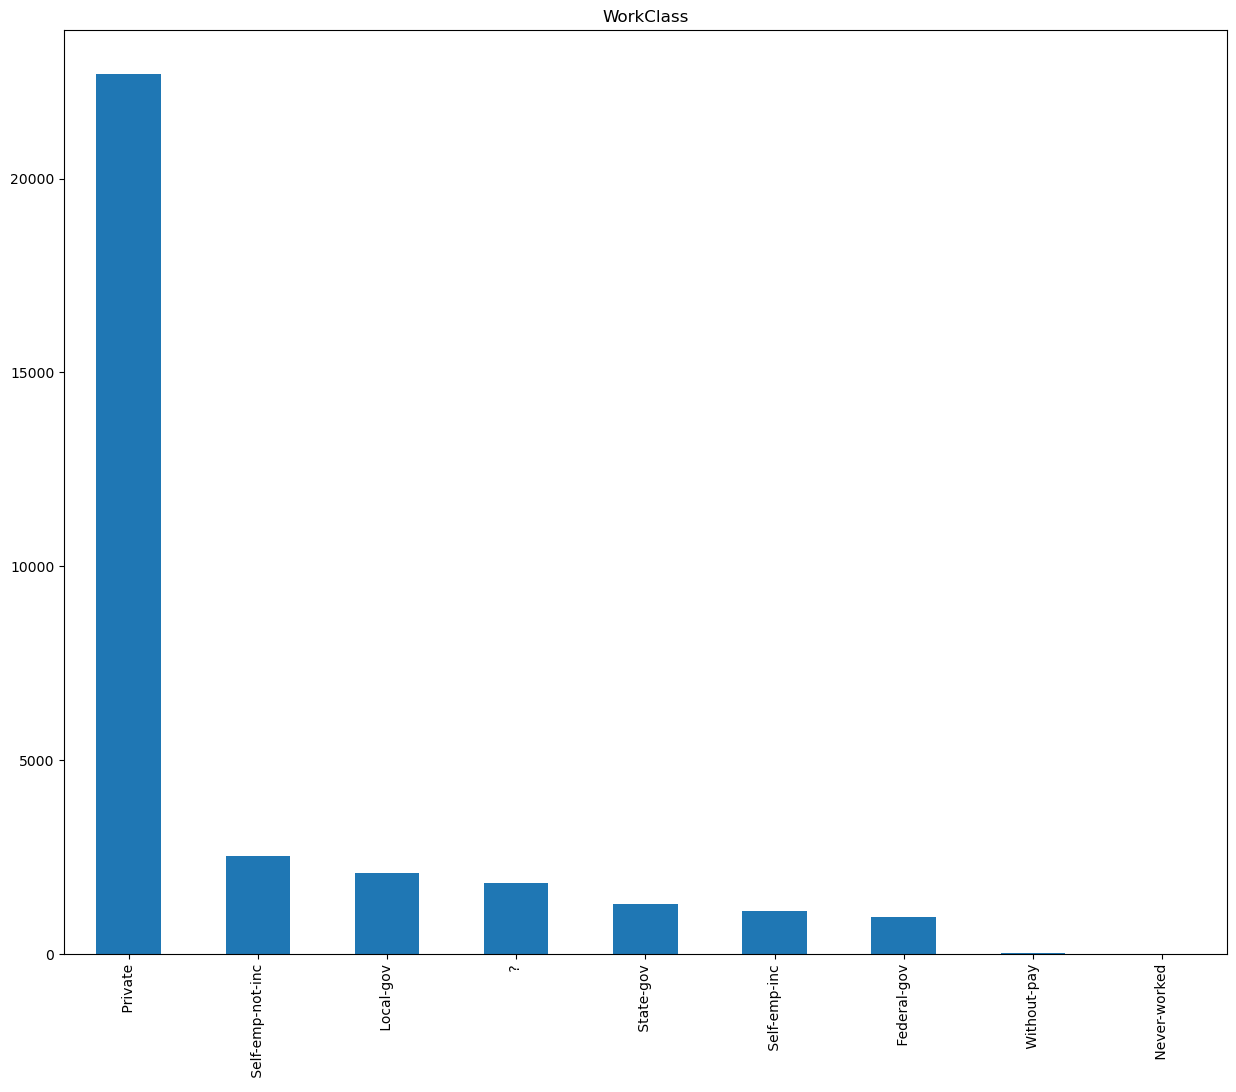

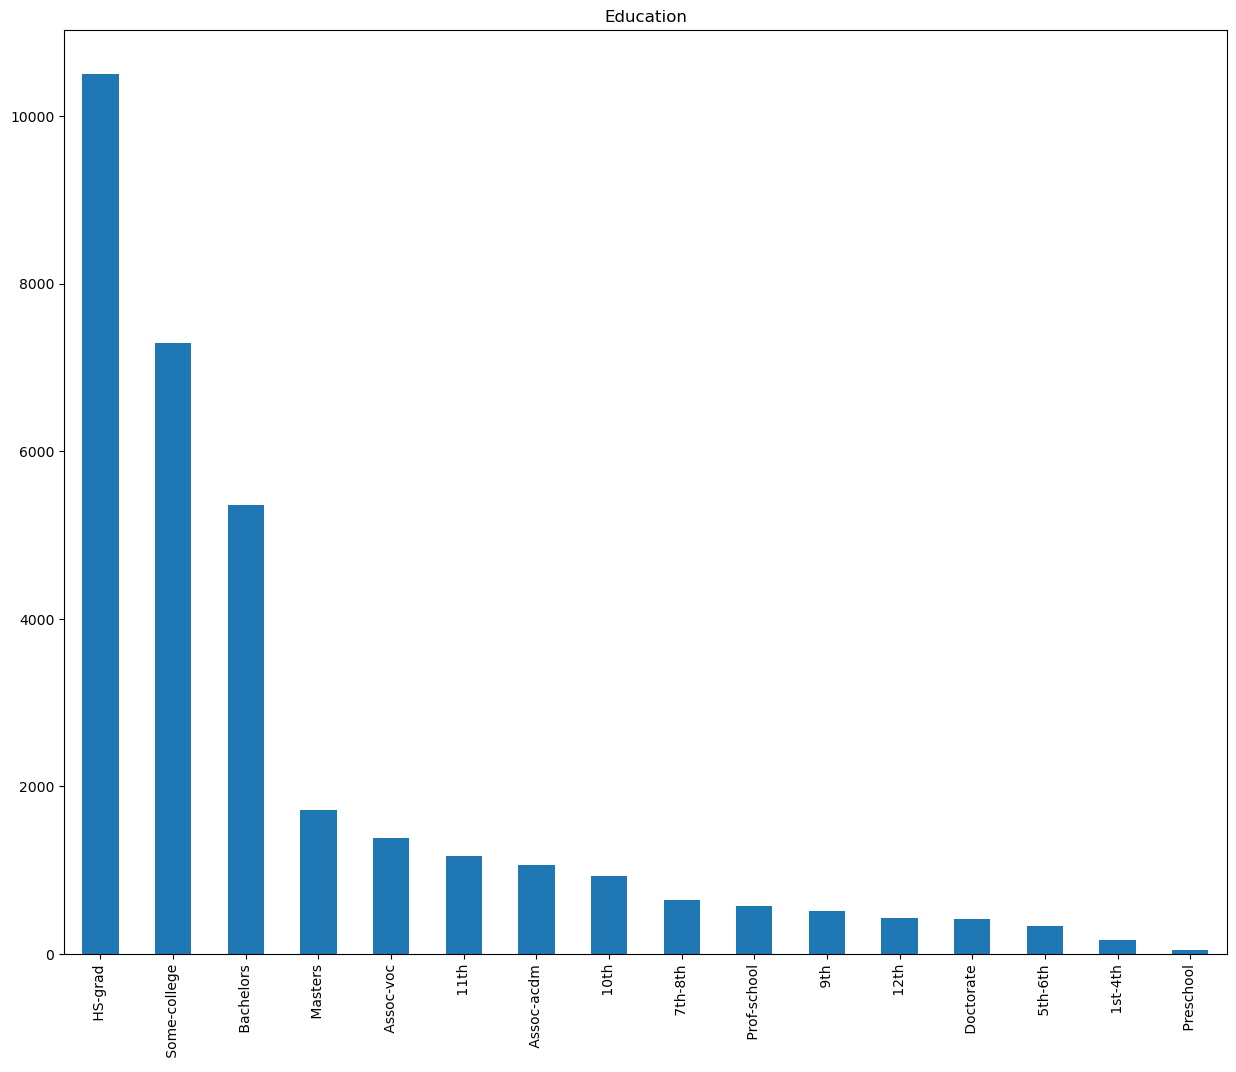

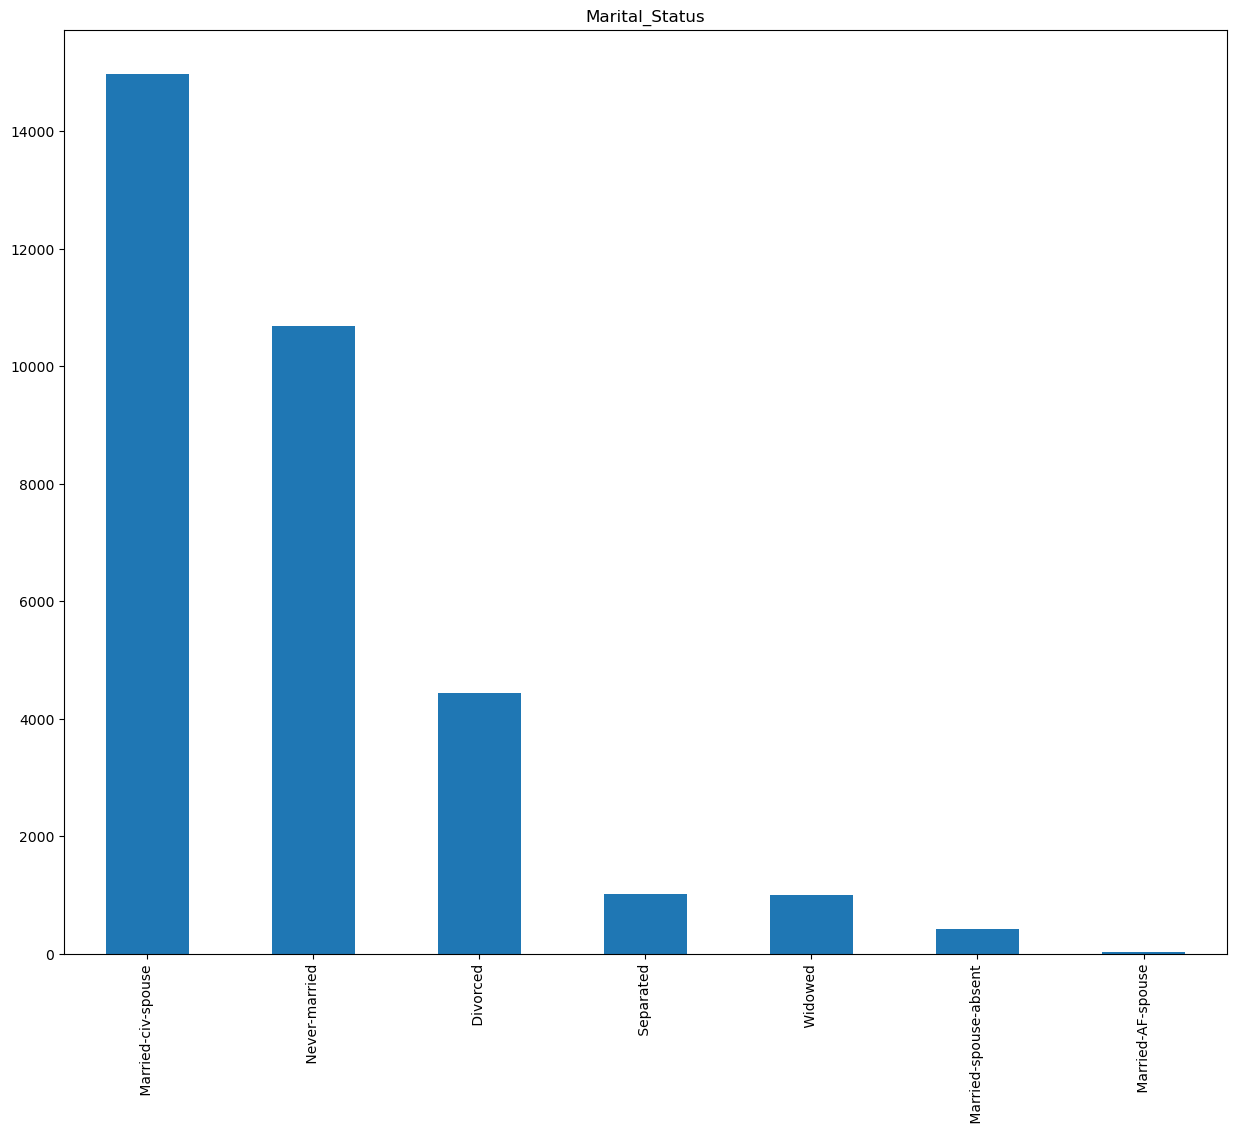

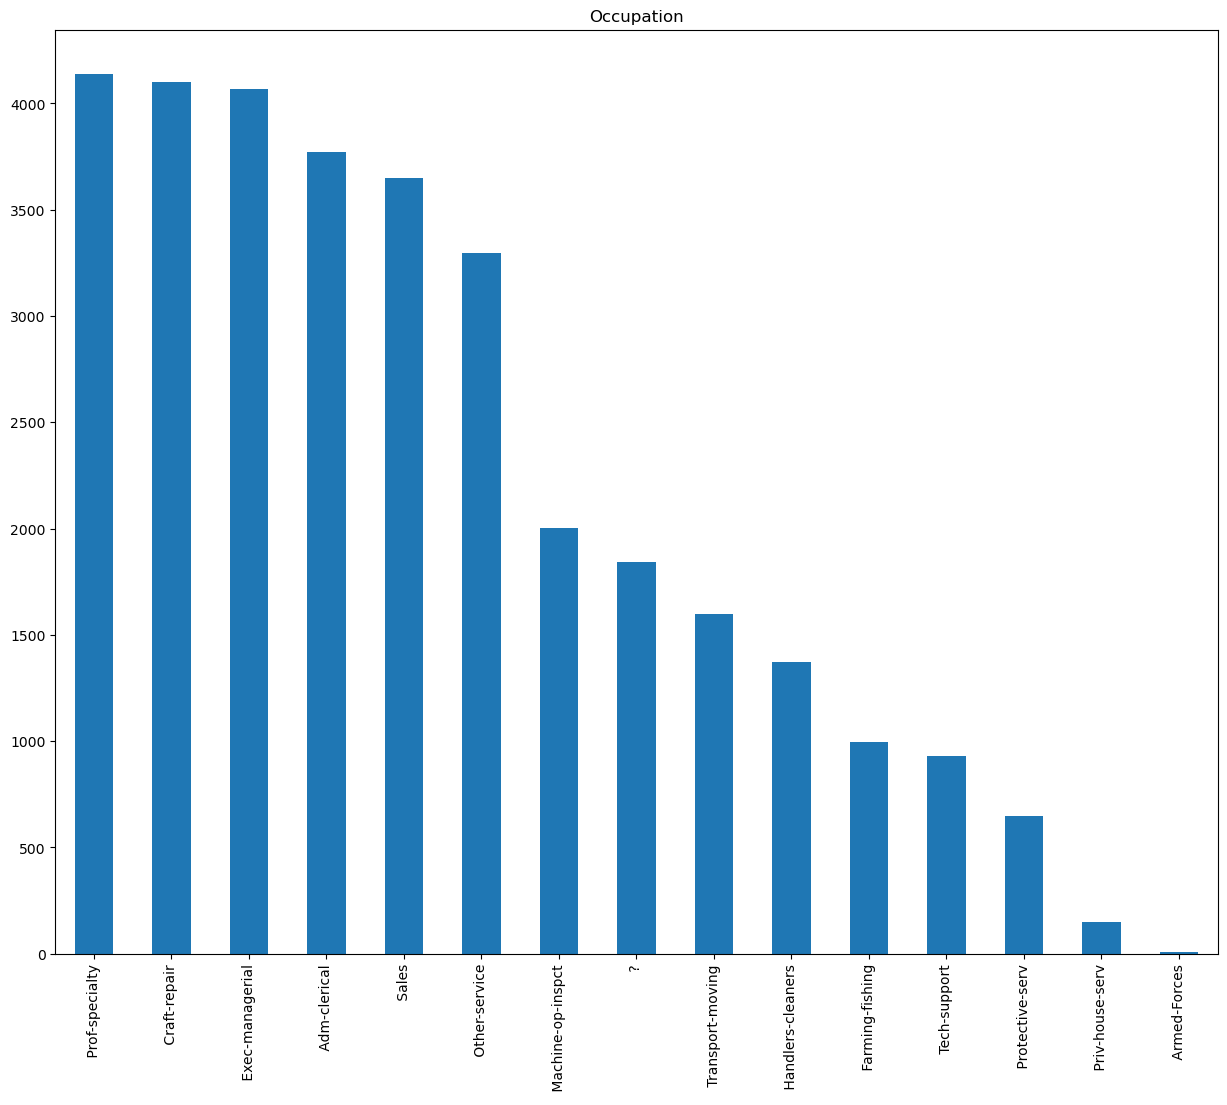

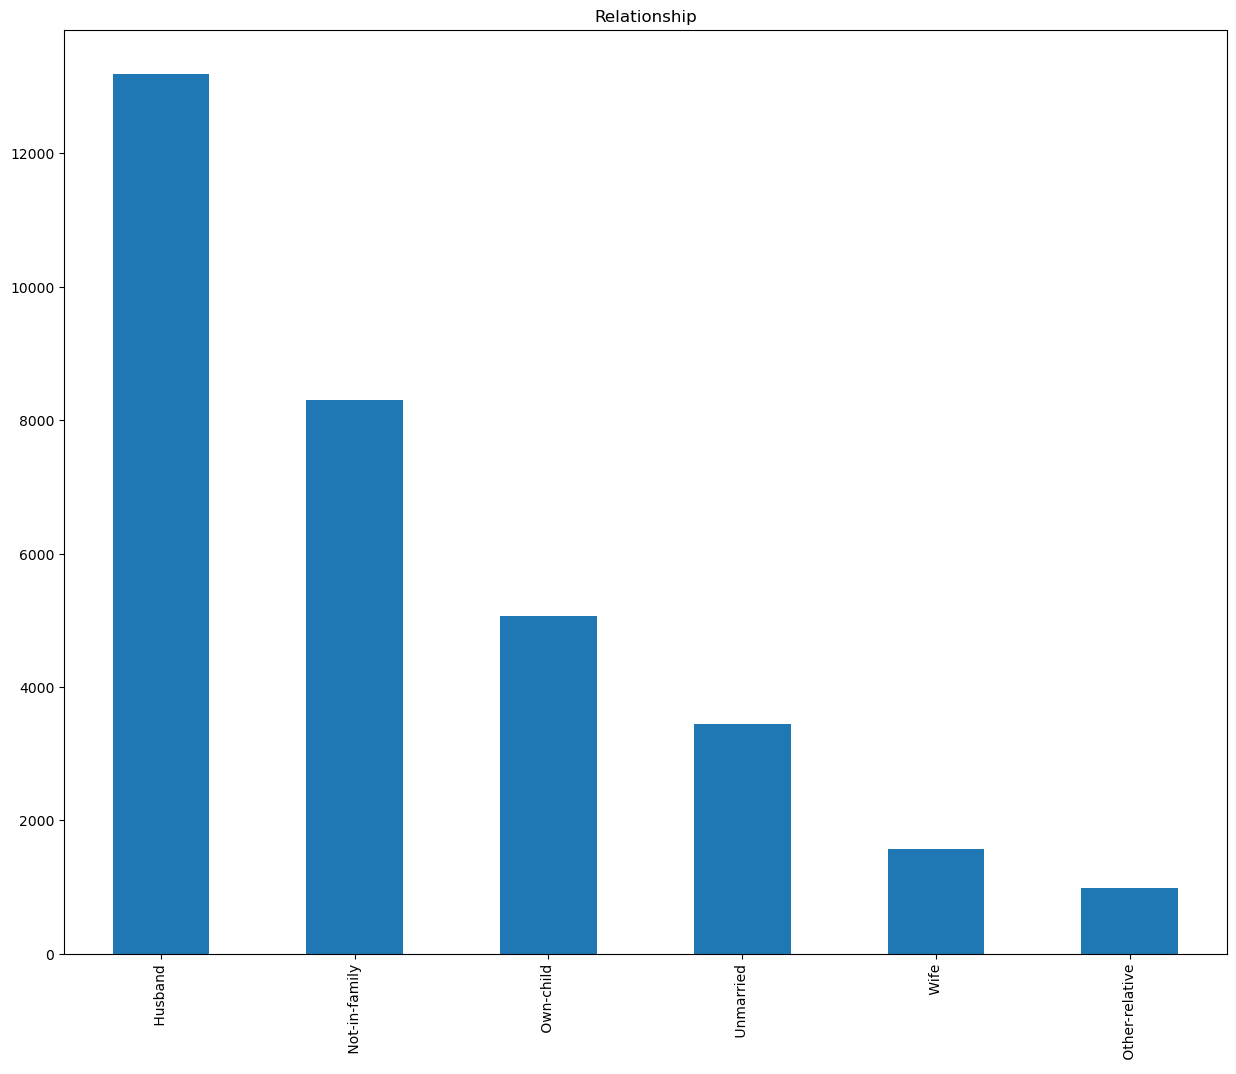

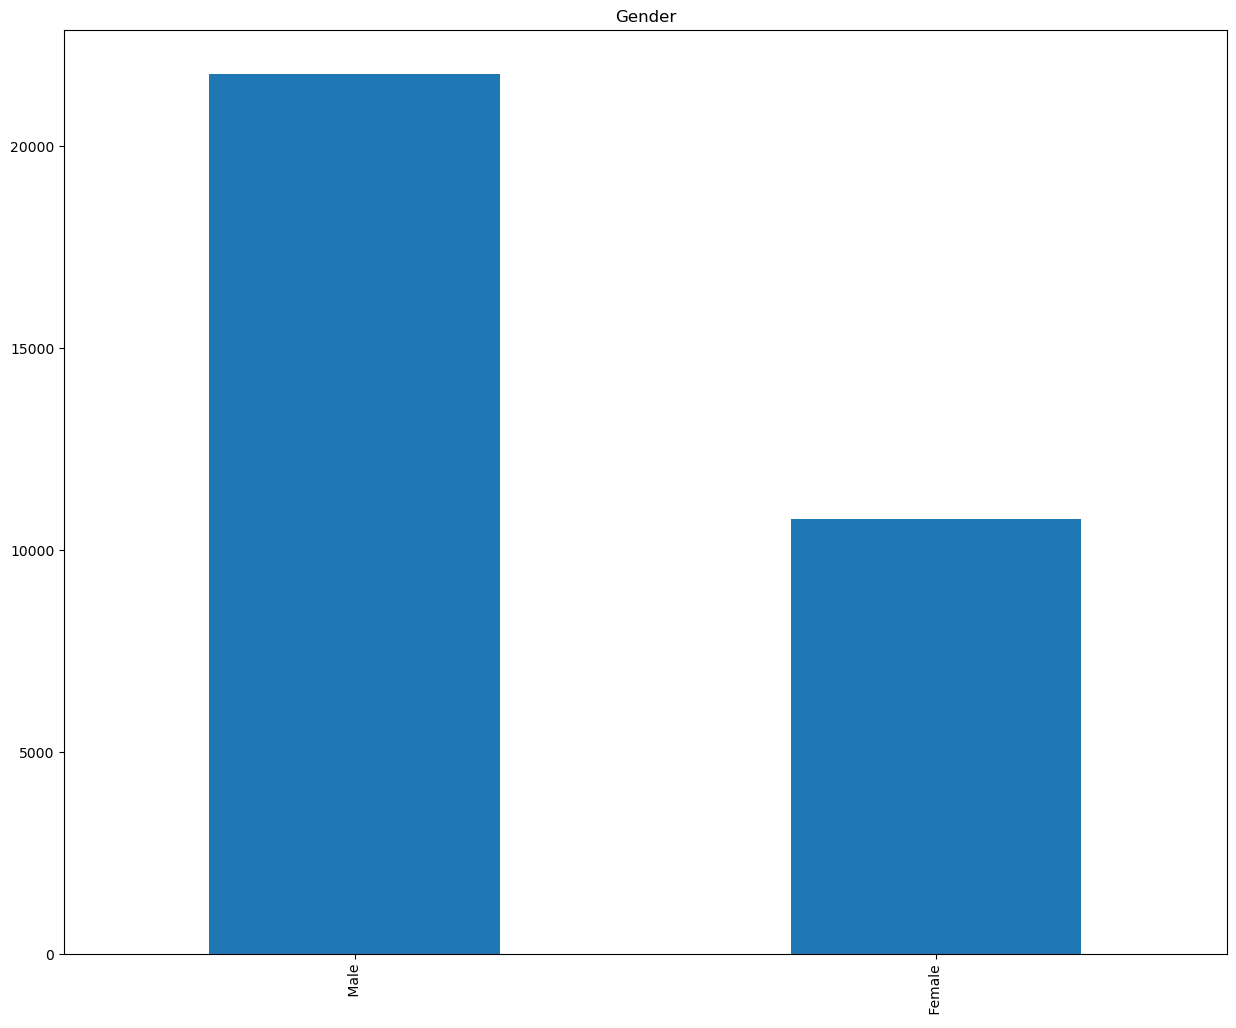

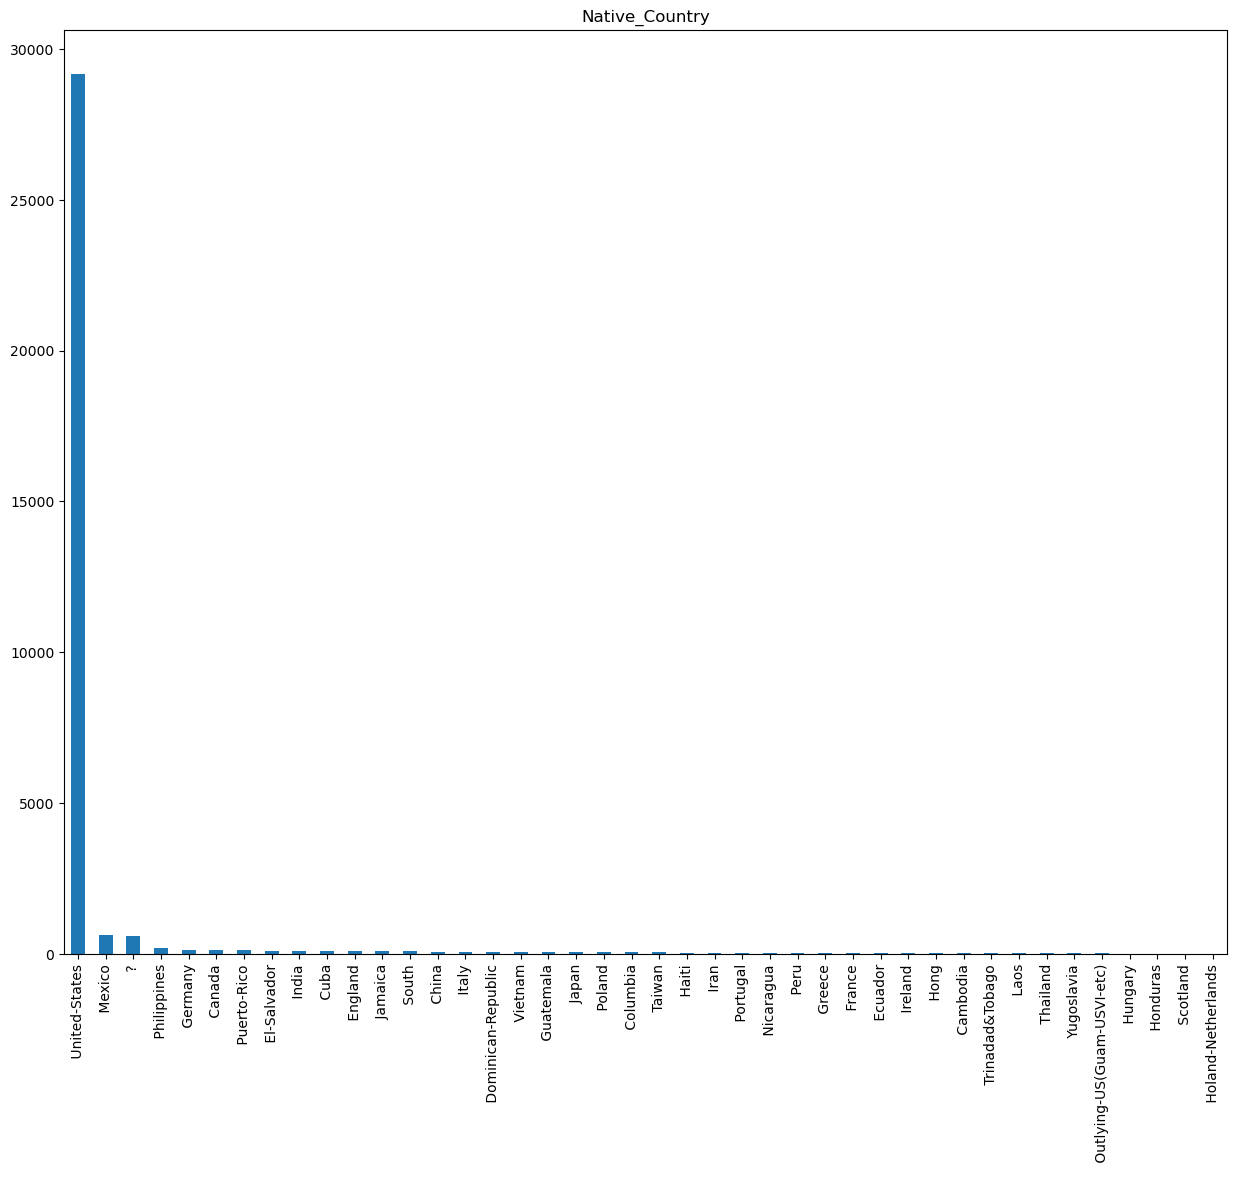

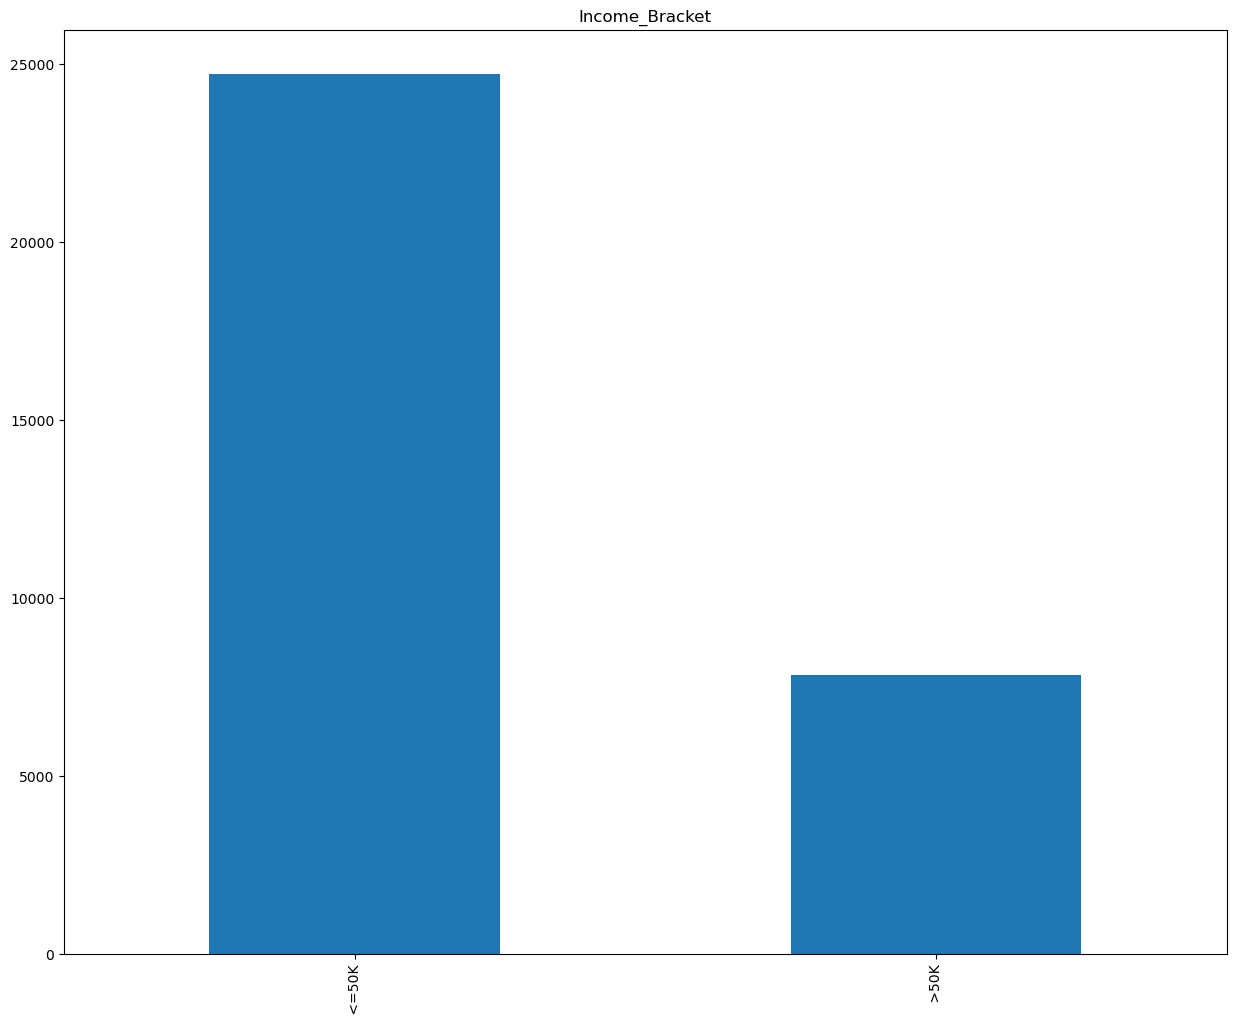

In [56]:
def plot_histograms(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in numerical_cols:
        df[col].plot(kind='hist', title=col)
        plt.show()
    for col in categorical_cols:
        df[col].value_counts().plot(kind='bar', title=col)
        plt.show()
        
plot_histograms(income)

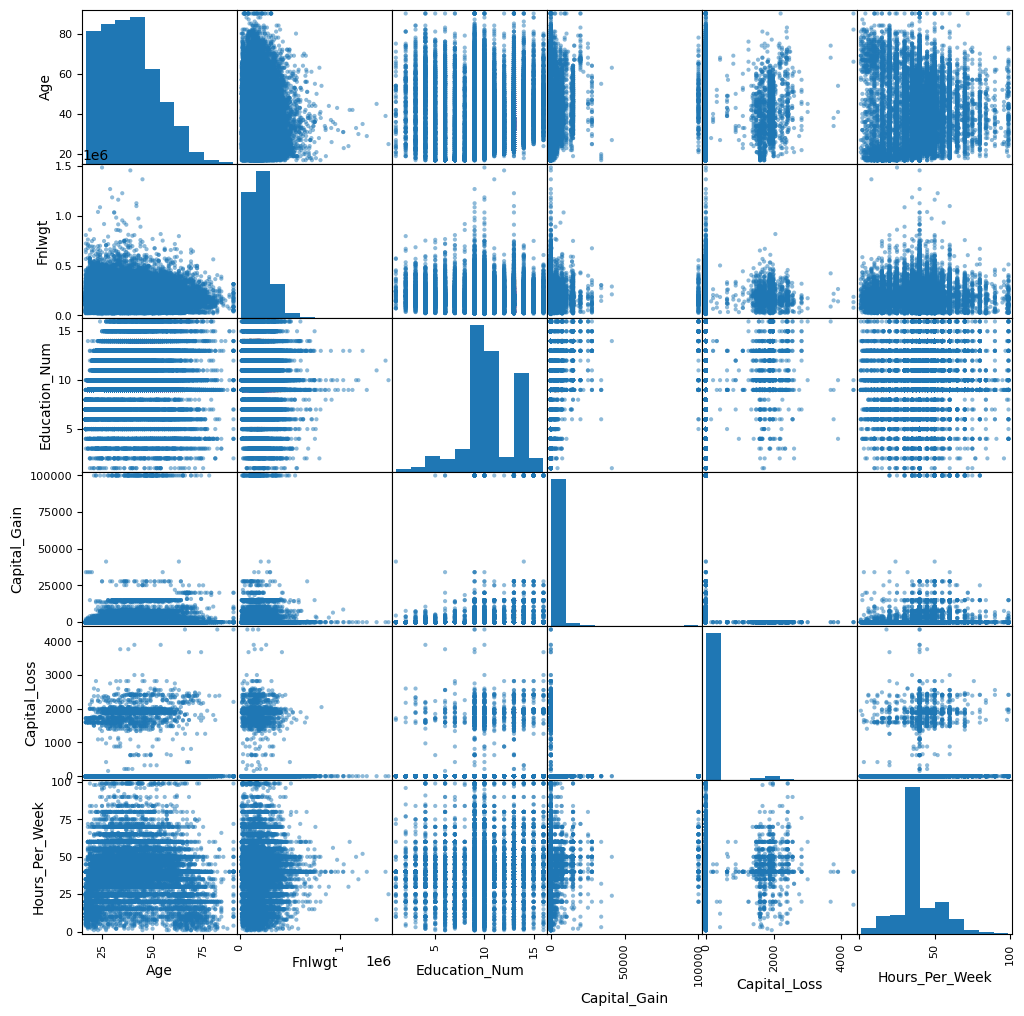

In [60]:
def plot_scatter_matrix(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    pd.plotting.scatter_matrix(df[numerical_cols], figsize=(12, 12))
    plt.show()
plot_scatter_matrix(income)

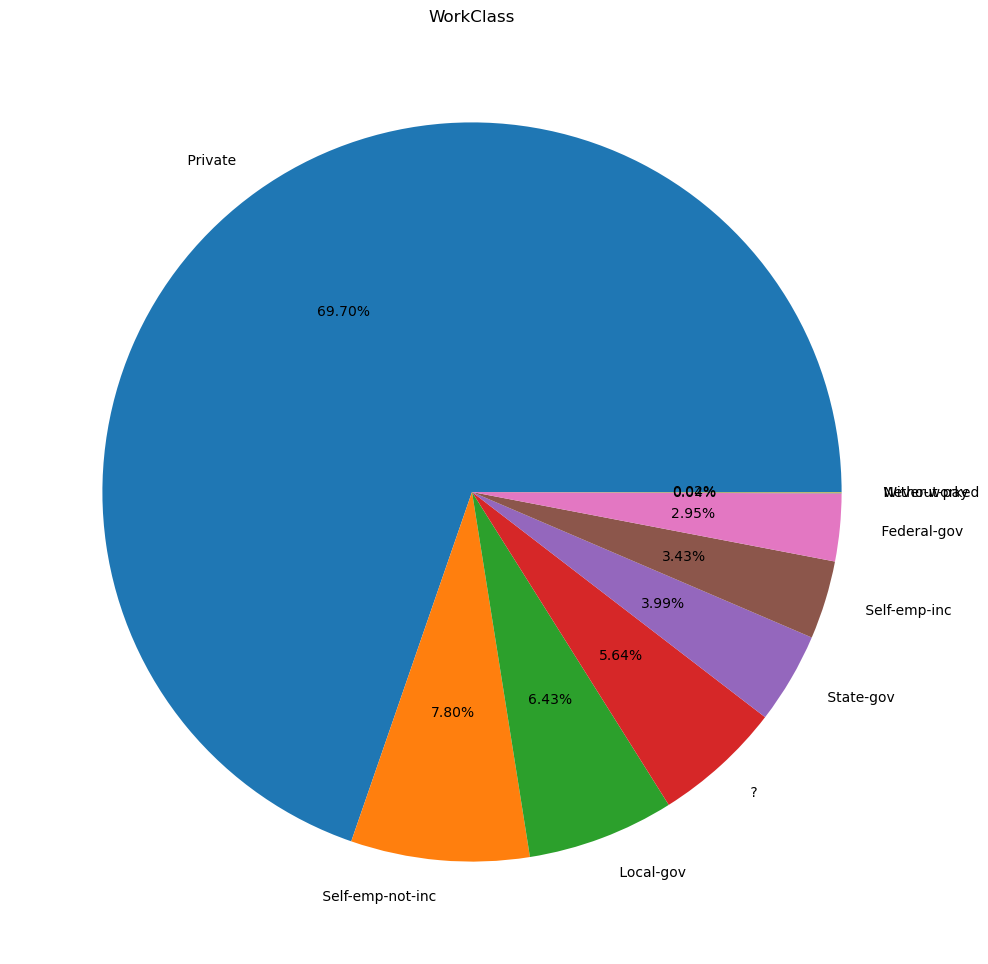

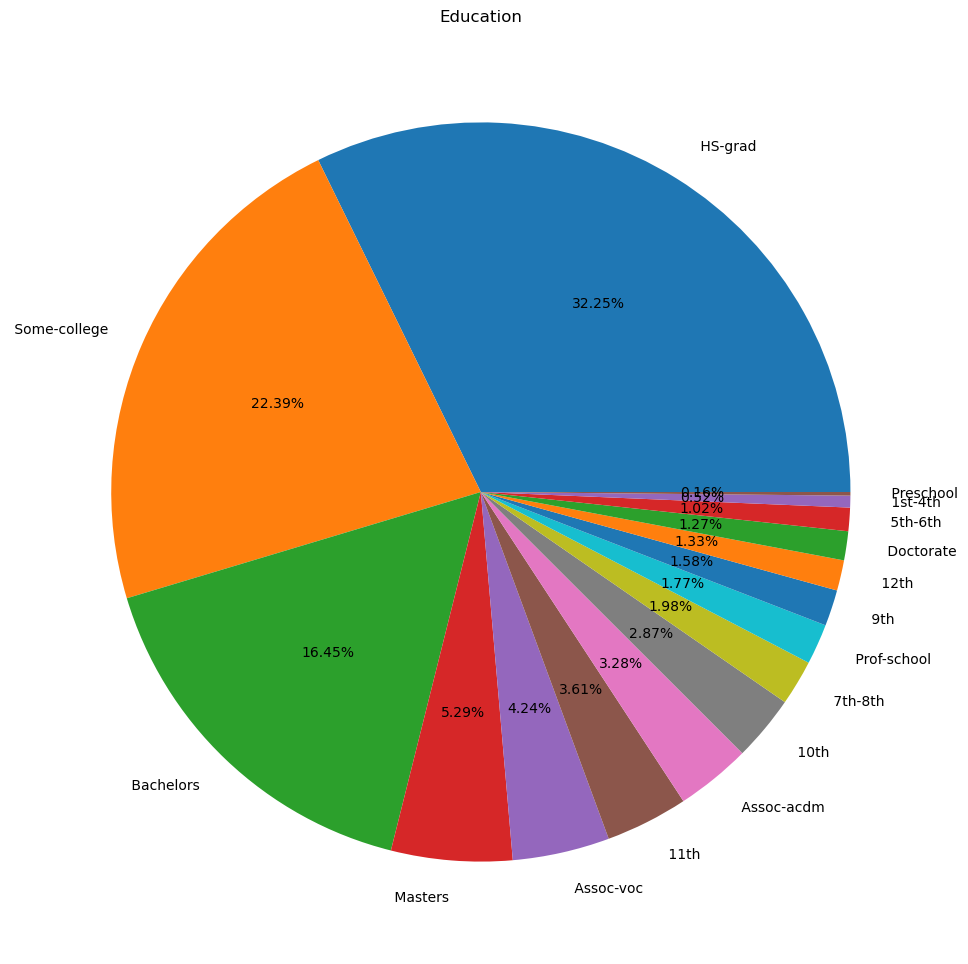

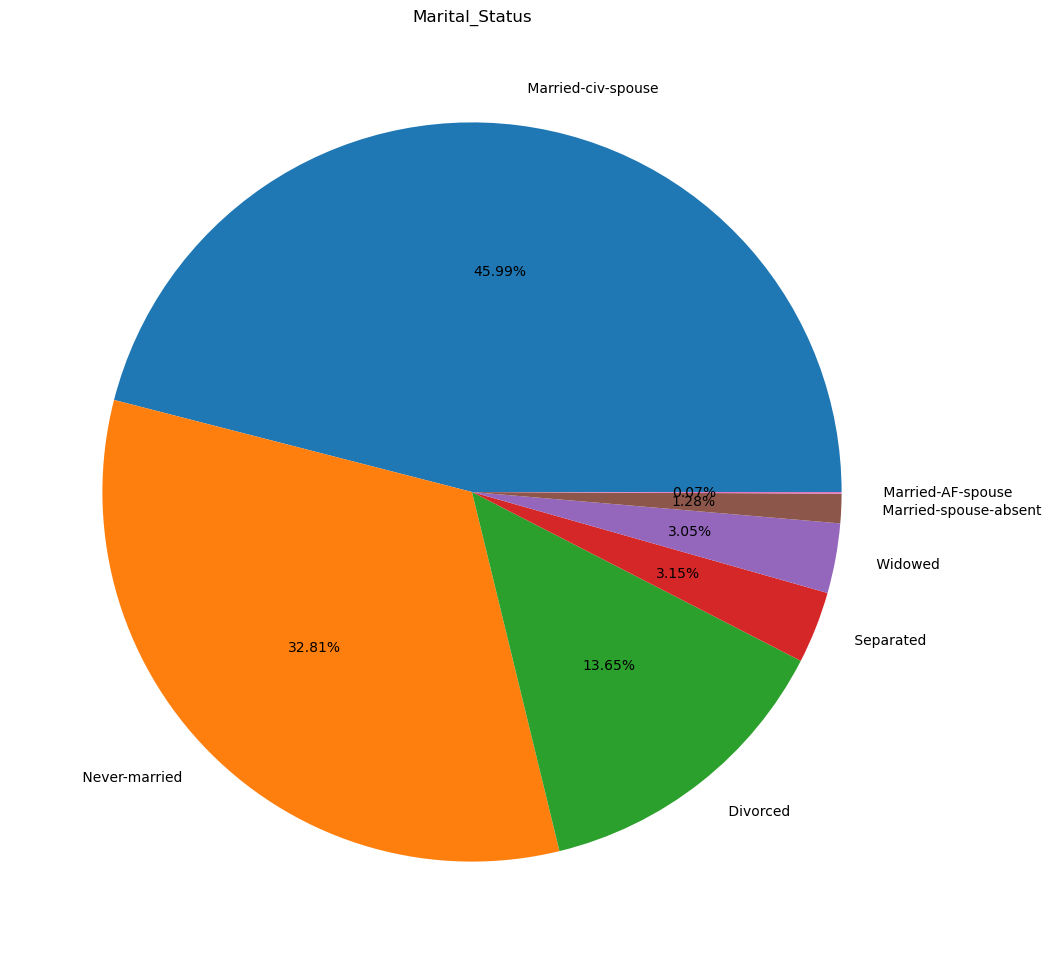

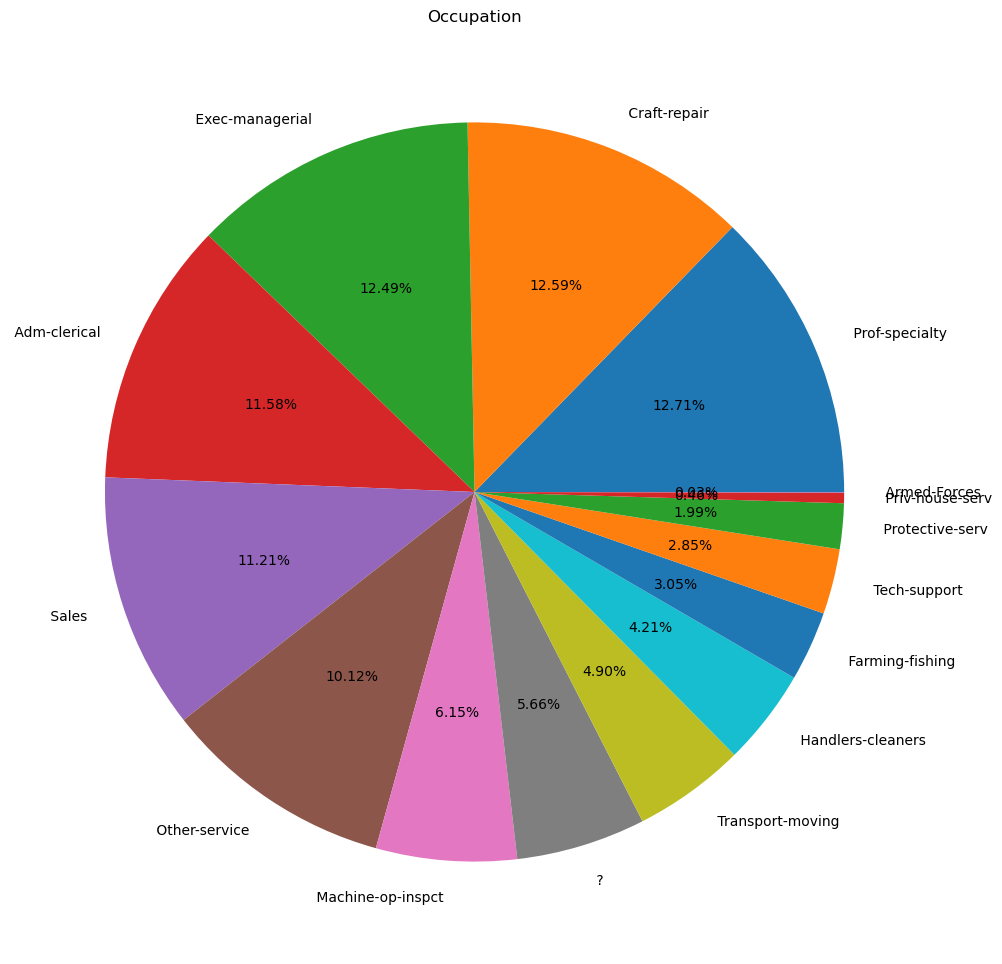

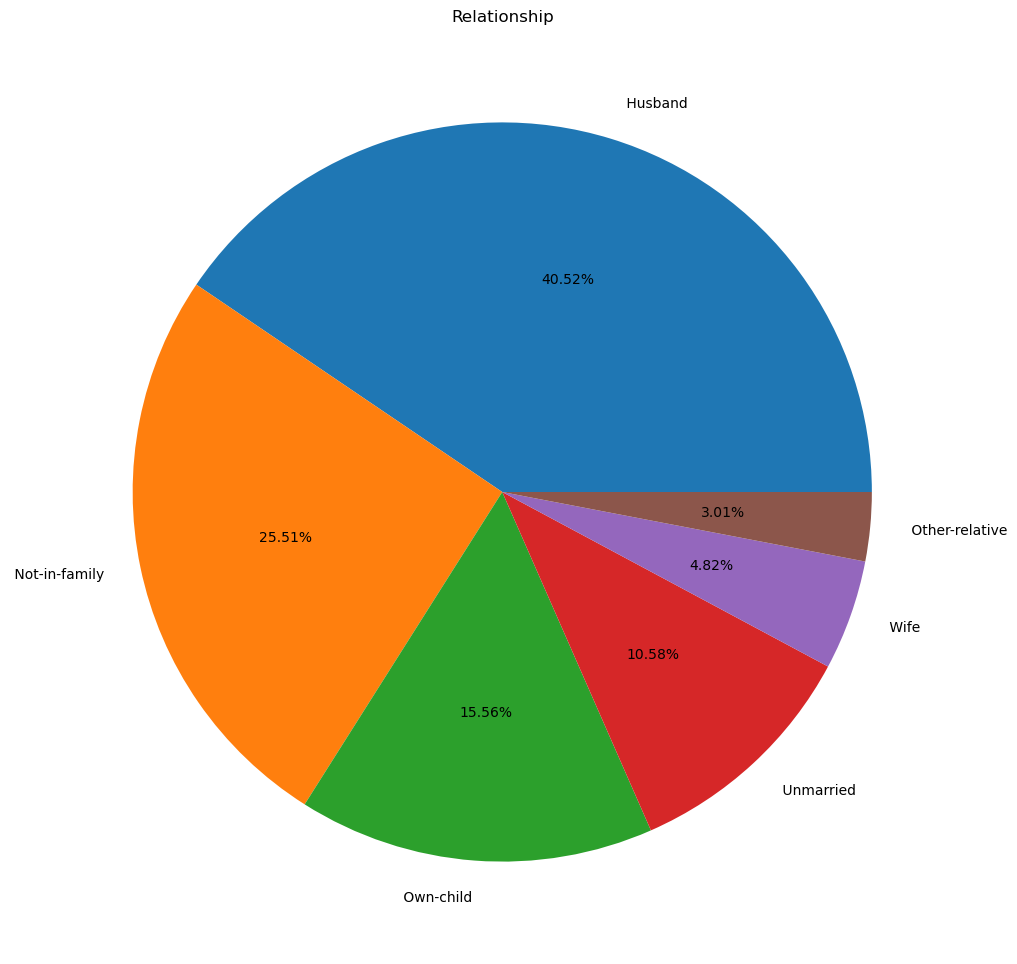

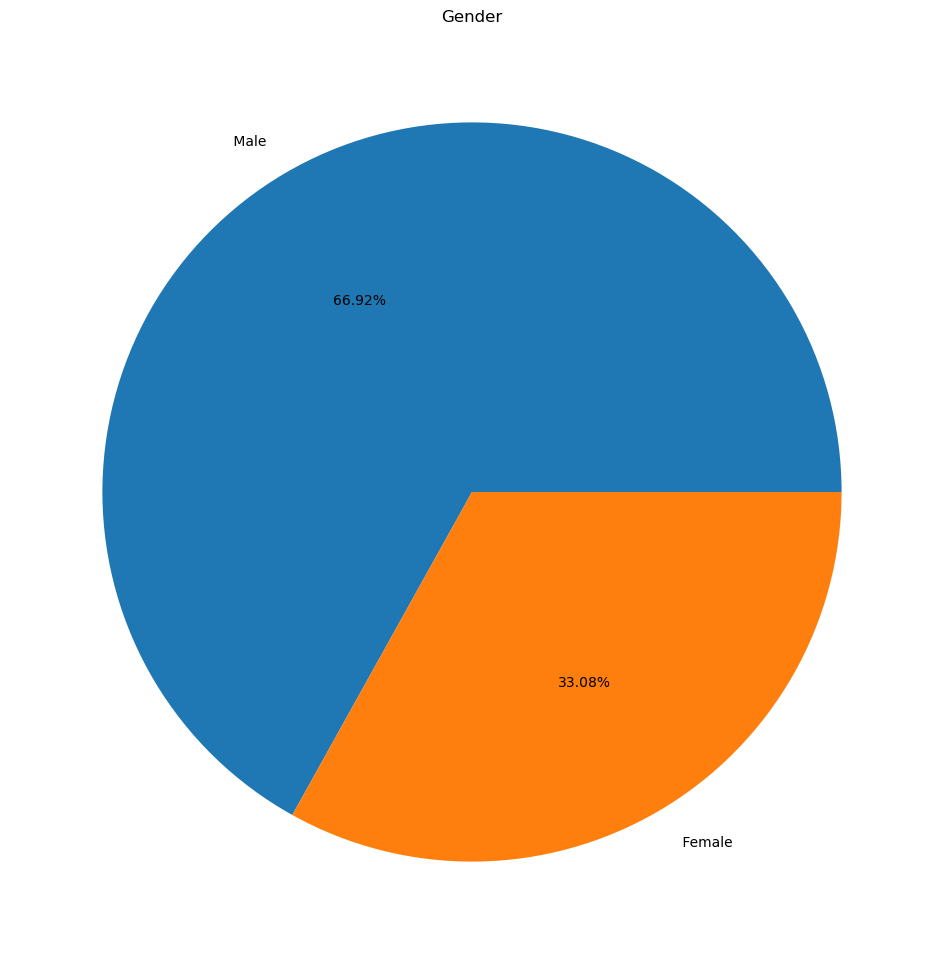

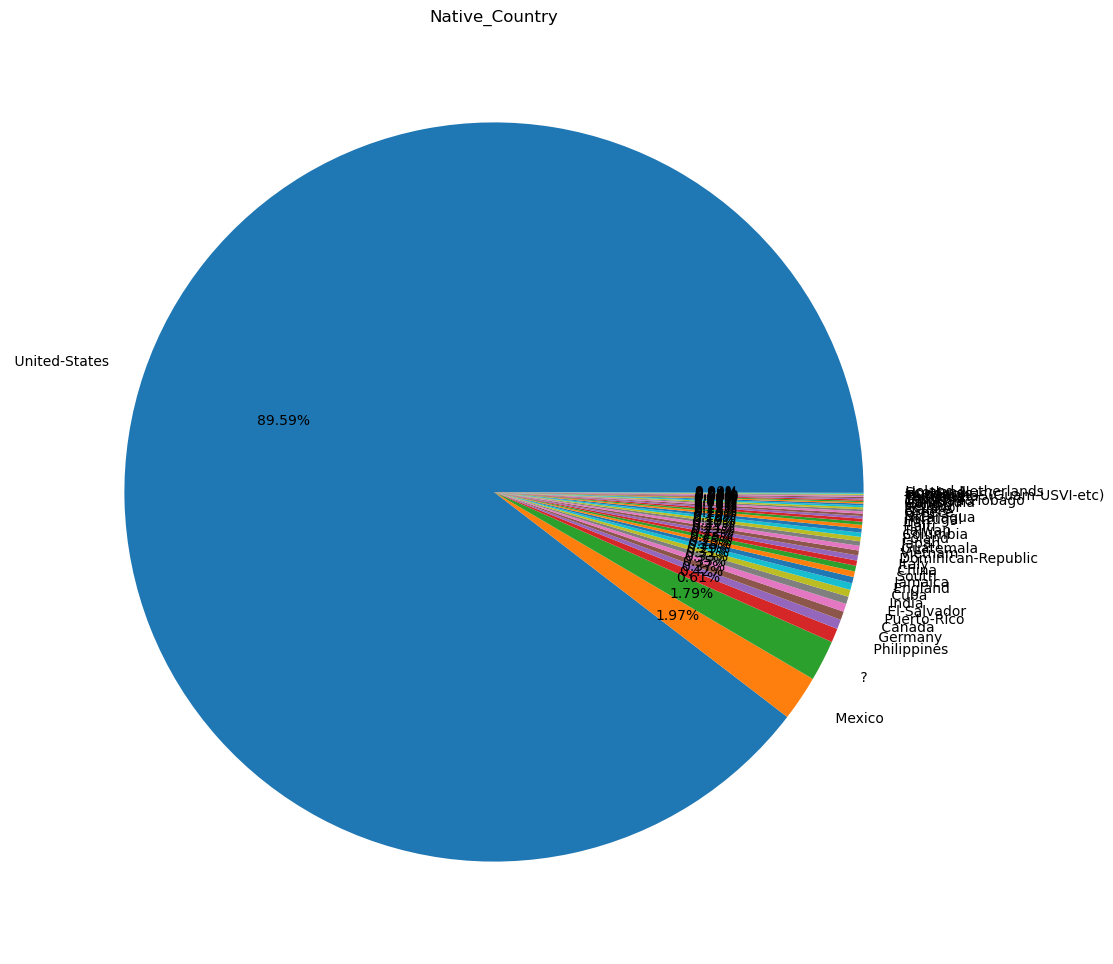

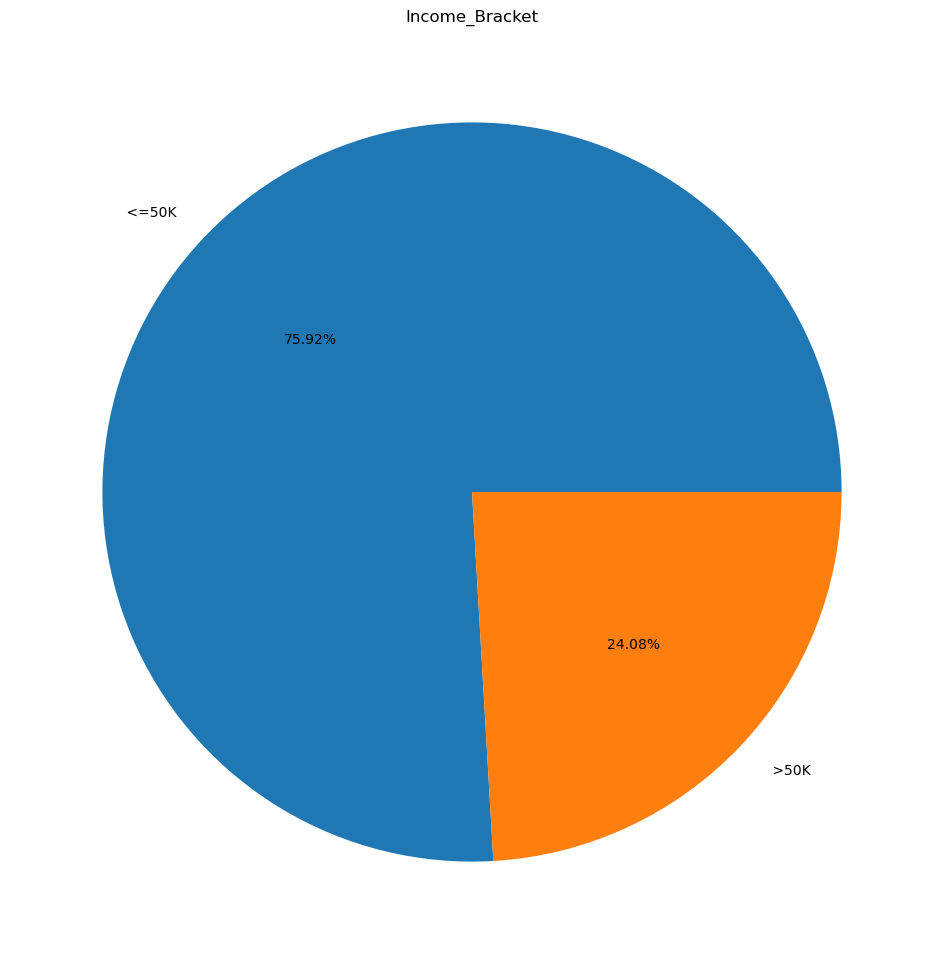

In [117]:
def pie_plotter(df):
    categoricals=df.select_dtypes(include=["category"]).columns
    for item in categoricals:
        garb=df[item].value_counts()
        plt.pie(garb.values,labels=garb.index,autopct="%.2f%%")
        plt.title(item)
        plt.show()
pie_plotter(income)